In [6]:
import os
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:

root_data_dir = r'E:\ZKP\persons comparision\Band Analysis\Epoch\Epoch_Super'

# band_names=['delta','theta','alpha','beta','gamma']

def averageAndConcat(local_path,category,band_name):
    file=os.path.join(local_path,band_name+'.xlsx')
    df=pd.read_excel(file)
    df=df.iloc[:,-8:-1]
    df = df.rename(columns=lambda x: re.sub(r'_[^_]*$', '', x))
    df = df.rename(columns=lambda x: x.replace('_',' '))
    df = df.rename(columns=lambda x: 'Occipital' if x == 'Parieto occipital' else x.replace('1', ''))
    result  = pd.melt(df, var_name='Region', value_name='Relative Band Power')
    result['Group']=category
    del df
    return result
   

In [27]:
band_in_this_context='gamma'
data_before=averageAndConcat(os.path.join(root_data_dir,'drug_before_s2'),category='MBT',band_name=band_in_this_context)
data_after=averageAndConcat(os.path.join(root_data_dir,'drug_after_s2'),category='MAT',band_name=band_in_this_context)
data_health=averageAndConcat(os.path.join(root_data_dir,'health_s2'),category='HC',band_name=band_in_this_context)
data=pd.concat([data_before,data_after,data_health])

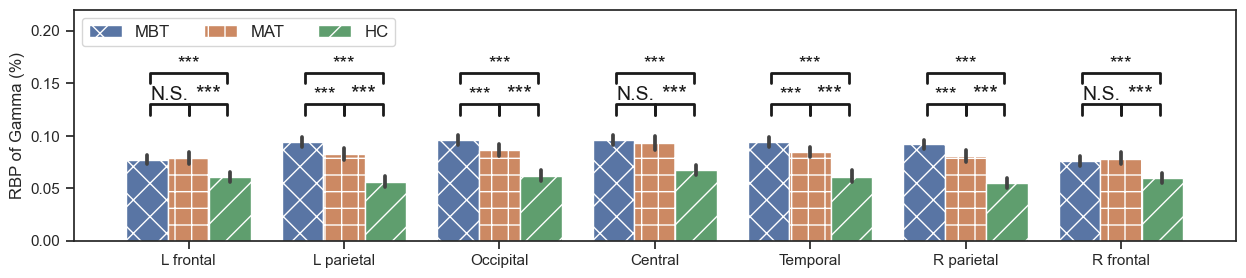

In [28]:
x_set=[-0.25,0,0.25,0.75,1,1.25,1.75,2,2.25,2.75,3,3.25,
       3.75,4,4.25,4.75,5,5.25,5.75,6,6.25]
sns.set_theme(style="ticks")
plt.figure(figsize=(15,3))
ax=sns.barplot(data=data,x='Region',y='Relative Band Power',hue='Group')

for i, bar in enumerate(ax.patches):
    if i in [j for j in range(0,7,1)]:
        bar.set_hatch('x')
        # bar.set_alpha(1)
    elif i in [j for j in range(7,14,1)]:
        bar.set_hatch('+')
        # bar.set_alpha(0.8)
    else:
        bar.set_hatch('/')
        # bar.set_alpha(0.6)
        
plt.legend(loc='upper left',ncol=3
           , frameon=True
           , fontsize=12)
bands_name=band_in_this_context[0].upper()+band_in_this_context[1:]
plt.ylabel(f"RBP of {bands_name} (%)")
plt.xlabel('')

def set_config(band:str,star_set):
    star_set_=star_set[band]
    bias=0
    if band=='delta':
        plt.ylim(0,4.8)
        y_=2.8
        h_=0.2
        bias=3*h_
    elif band=='theta':
        plt.ylim(0,1.4)
        y_=0.8
        h_=0.05
        bias=3*h_
    elif band=='alpha':
        plt.ylim(0,1.3)
        y_=0.7
        h_=0.05
        bias=3*h_
    elif band=='beta':
        plt.ylim(0,0.4)
        y_=0.22
        h_=0.02
        bias=3*h_
    elif band=='gamma':
        plt.ylim(0,0.22)
        y_=0.12
        h_=0.01
        bias=3*h_
    else:
        raise ValueError('band name error')

    for i in range(0,7):
        star1,star2,star3=star_set_[i+1][0],star_set_[i+1][1],star_set_[i+1][2]
        j=i*3
        x1,x2=x_set[0+j],x_set[1+j]
        x3,x4=x_set[0+j],x_set[2+j]
        x5,x6=x_set[1+j],x_set[2+j]
        
        plt.plot([x1, x1, x2, x2], [y_, y_+h_, y_+h_, y_], lw=2, c="k")
        plt.text((x1+x2)*.5, y_+h_, star1, ha='center', va='bottom', color="k",fontsize=14)
        
        plt.plot([x3, x3, x4, x4], [y_+bias, y_+h_+bias, y_+h_+bias, y_+bias], lw=2, c="k")
        plt.text((x3+x4)*.5, y_+h_+bias, star2, ha='center', va='bottom', color="k",fontsize=14)

        plt.plot([x5, x5, x6, x6], [y_, y_+h_, y_+h_, y_], lw=2, c="k")
        plt.text((x5+x6)*.5, y_+h_, star3, ha='center', va='bottom', color="k",fontsize=16)

# Result from previous analysis
star_set={'delta':{1:['**','***','***'],2:['N.S.','***','***'],3:['N.S.','***','***'],4:['*','***','***'],5:['N.S.','***','***'],6:['N.S.','***','***'],7:['N.S.','***','***']},
          'theta':{1:['***','N.S.','*'],2:['***','N.S.','***'],3:['**','***','***'],4:['***','N.S.','*'],5:['***','N.S.','N.S.'],6:['**','**','***'],7:['**','N.S.','N.S.']},
            'alpha':{1:['***','***','N.S.'],2:['*','***','***'],3:['*','***','***'],4:['***','***','***'],5:['**','***','***'],6:['**','***','***'],7:['**','***','*']},
            'beta':{1:['N.S.','***','***'],2:['***','***','***'],3:['***','***','***'],4:['N.S.','***','***'],5:['**','*','***'],6:['***','*','***'],7:['N.S.','*','***']},
            'gamma':{1:['N.S.','***','***'],2:['***','***','***'],3:['***','***','***'],4:['N.S.','***','***'],5:['**','***','***'],6:['***','***','***'],7:['N.S.','***','***']}}
star_set_2={'delta':{1:['**','N.S.','***'],2:['N.S.','***','***'],3:['N.S.','***','***'],4:['***','N.S.','***'],5:['N.S.','***','***'],6:['***','***','***'],7:['***','N.S.','***']},
          'theta':{1:['***','**','N.S.'],2:['***','N.S.','***'],3:['N.S.','***','***'],4:['***','*','N.S.'],5:['***','N.S.','N.S.'],6:['***','***','***'],7:['***','N.S.','**']},
          'alpha':{1:['***','***','N.S.'],2:['***','***','***'],3:['***','***','***'],4:['***','***','***'],5:['***','***','***'],6:['***','***','***'],7:['***','***','***']},
          'beta':{1:['*','***','***'],2:['*','***','***'],3:['**','***','***'],4:['N.S.','***','***'],5:['*','*','***'],6:['***','*','***'],7:['N.S.','*','***']},
          'gamma':{1:['N.S.','***','***'],2:['***','***','***'],3:['***','***','***'],4:['N.S.','***','***'],5:['***','***','***'],6:['***','***','***'],7:['N.S.','***','***']}}
set_config(band_in_this_context,star_set_2)
# plt.figure(dpi=5)
plt.show()